In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
# Se usaran los sets normalizados bajo columnas SOLAMENTE.
train = pd.read_csv('../normalized2_train.csv')
test = pd.read_csv('../normalized2_test.csv')

# Casteamos todo a int, esto es porque XgBoost dio problemas usando el set de datos con los datos heredados.
const = ['antiguedad', 'banos', 'garages', 'metroscubiertos', 'metrostotales', 'metros']
every_column_except_y= [col for col in train.columns if col not in ['preciomt2', 'precio','id', 'logpreciomt2', 'fecha', 'descripcion', 'titulo', 'logprecio']]
columns = [col for col in train[every_column_except_y].columns if col not in const]
# columns
train.loc[:, columns] = train[columns].fillna(0)
for column in columns:
    train[column] = train[column].astype('int32')

In [21]:
# Generamos el modelo y un set de test para tener alguna metrica
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 10, reg_alpha = 1.2, n_estimators = 1000, reg_lambda = 1.4, subsample=0.8, seed=30)
every_column_except_y= [col for col in train.columns if col not in ['preciomt2', 'precio','id', 'logpreciomt2', 'descripcion', 'titulo', 'logprecio']]


In [18]:
X, y = train.loc[:,every_column_except_y], train['logprecio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=1.2, reg_lambda=1.4, scale_pos_weight=1,
             seed=30, silent=None, subsample=0.8, verbosity=1)

0.01917505331373225


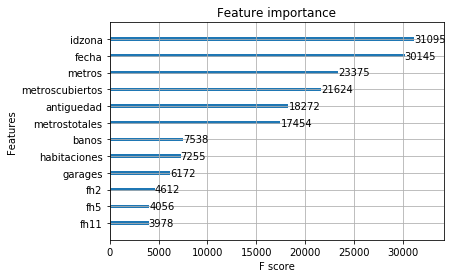

In [19]:
pred= xg_reg.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, pred))
# Métrica de evaluación
def RMSLE(actual, pred):
    actualLog = np.log(actual + 1)
    predLog = np.log(pred + 1)
    return (np.mean((actualLog - predLog) ** 2)) **.5
print(RMSLE(y_test, pred))
# pred
# rmse
xgb.plot_importance(xg_reg, max_num_features=12)

In [26]:
X, y = train.loc[:,every_column_except_y], train['logprecio']
# #Entrenamos con el dataset entero
xg_reg.fit(train[every_column_except_y], train['logpreciomt2'])
# test.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=1.2, reg_lambda=1.4, scale_pos_weight=1,
             seed=30, silent=None, subsample=0.8, verbosity=1)

In [27]:
#Predecimos y guardamos
pred = xg_reg.predict(test[every_column_except_y])
final = test[['id']]
final.loc[:, 'target'] = test.metros * np.expm1(pred)
final.set_index('id').to_csv('../prediction_xgboostTomTHT4.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(60000, 2)

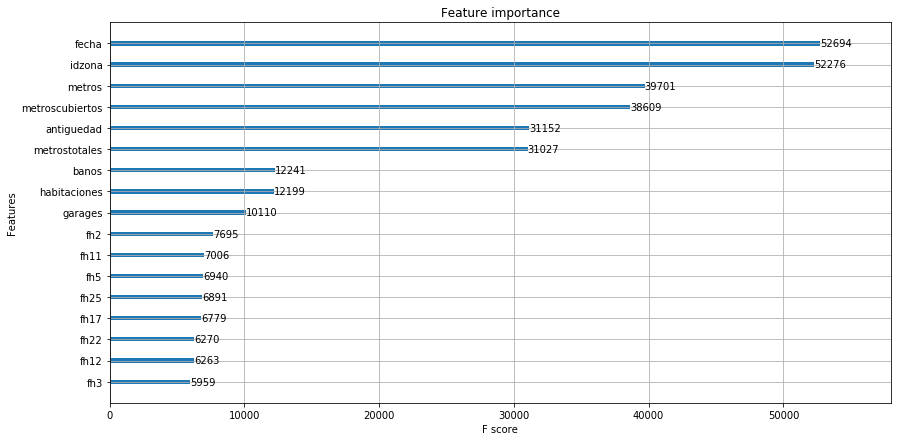

In [42]:
#Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
f = 'total_cover'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 7)
xgb.plot_importance(xg_reg, max_num_features=17)


